In [100]:
# ======================
# 1. Import Libraries
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [102]:
# ======================
# 2. Data Loading & Initial Exploration
# ======================
df = pd.read_csv("Titanic-Dataset.csv")

# Basic dataset info
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False))

# Display sample data
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (891, 12)

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values:
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


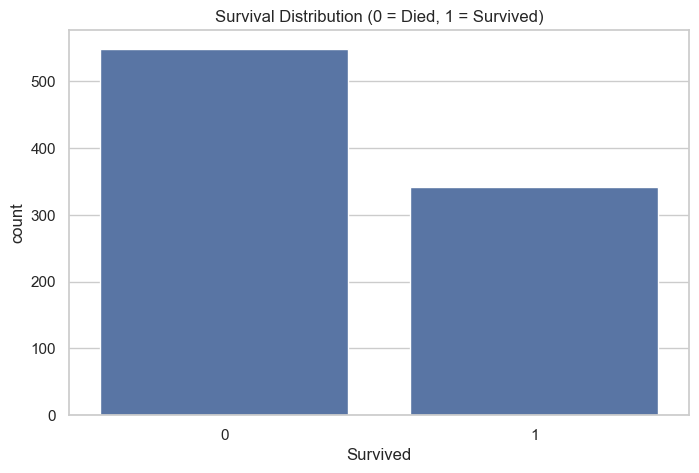

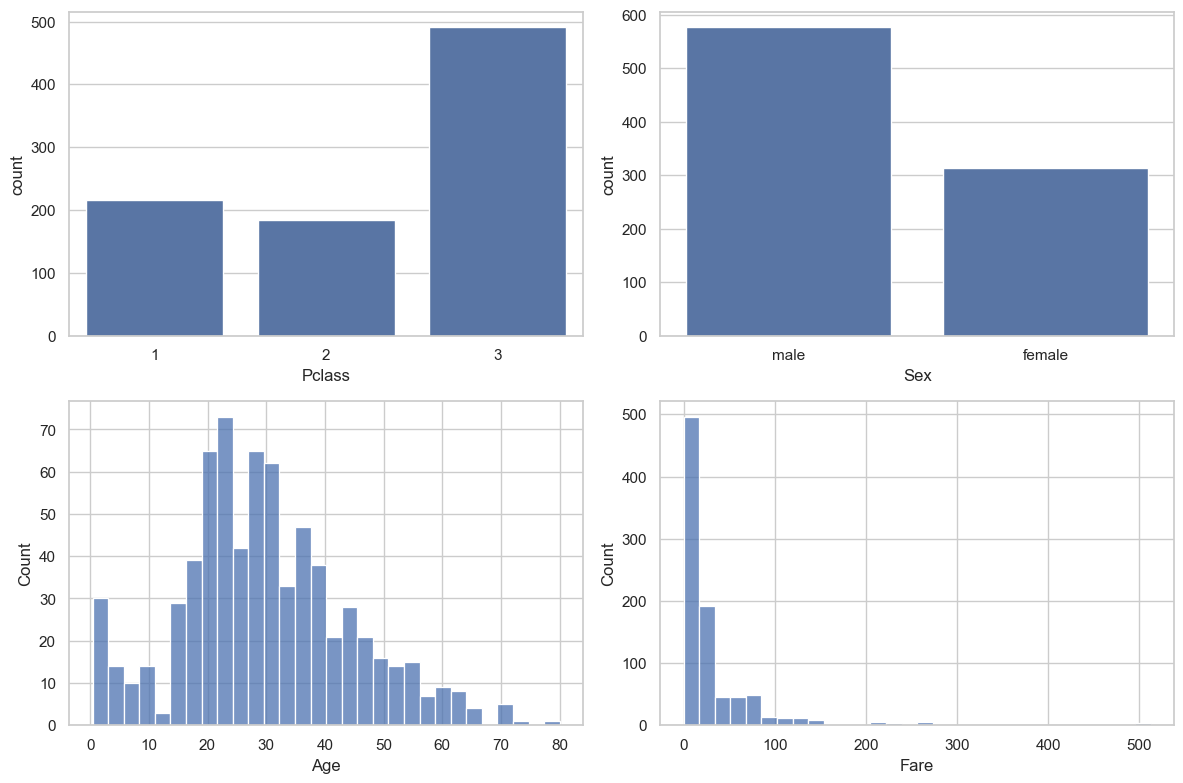

In [104]:
# ======================
# 3. Data Visualization
# ======================
# Target variable distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()

# Feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x='Pclass', data=df, ax=axes[0,0])
sns.countplot(x='Sex', data=df, ax=axes[0,1])
sns.histplot(df['Age'].dropna(), bins=30, ax=axes[1,0])
sns.histplot(df['Fare'], bins=30, ax=axes[1,1])
plt.tight_layout()
plt.show()


In [105]:
# ======================
# 4. Data Cleaning
# ======================
# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Verify cleaning
print("\nMissing values after cleaning:\n", df.isnull().sum())



Missing values after cleaning:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [106]:
# ======================
# 6. Data Preparation
# ======================
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Split data
X = df.drop('Survived', axis=1)
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True).astype(int)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5662 - loss: 2.8700 - val_accuracy: 0.7542 - val_loss: 2.3440 - learning_rate: 0.0010
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6259 - loss: 2.6093 - val_accuracy: 0.7877 - val_loss: 2.2057 - learning_rate: 0.0010
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6980 - loss: 2.3511 - val_accuracy: 0.7821 - val_loss: 2.1133 - learning_rate: 0.0010
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7011 - loss: 2.2447 - val_accuracy: 0.7933 - val_loss: 2.0056 - learning_rate: 0.0010
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7326 - loss: 2.1272 - val_accuracy: 0.7877 - val_loss: 1.9262 - learning_rate: 0.0010
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7504 - loss: 1.9642 - val_accuracy: 0.8045 - val_loss: 1.8404 - learning_rate: 0.0010
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7490 - loss: 1.9021 - val_acc

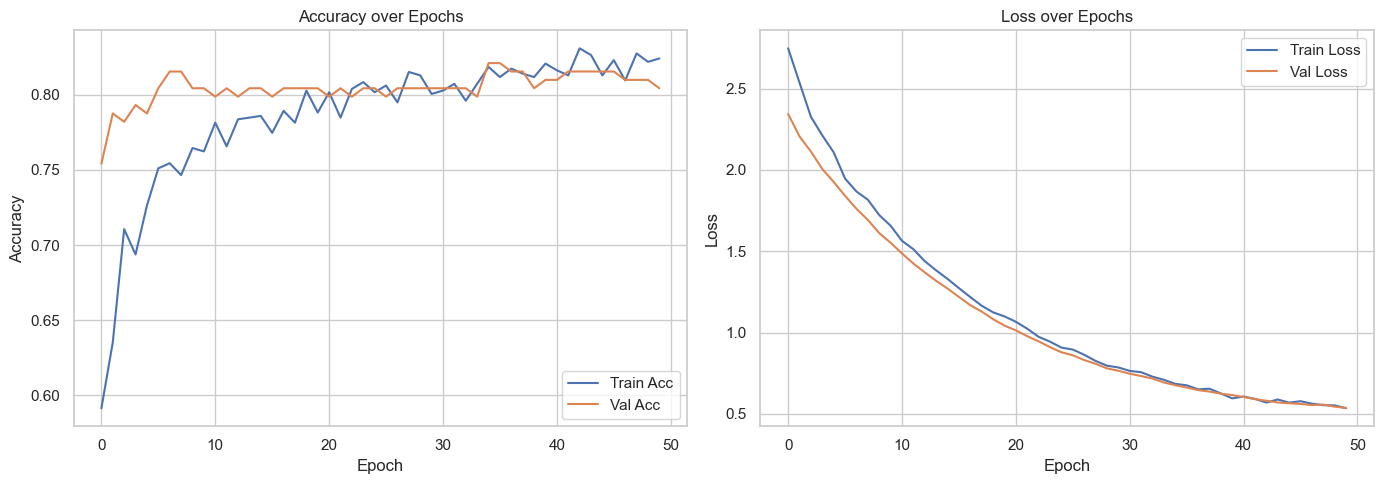

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# He initializer
he_init = HeNormal()

# Define the model
model = Sequential([
    Dense(64, activation='relu', kernel_initializer=he_init, kernel_regularizer=l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_initializer=he_init, kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Learning rate scheduler callback
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# Train model
history = model.fit(
    X_train_scaled, y_train_resampled,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[lr_scheduler],
    verbose=1
)

# Predict
train_pred = (model.predict(X_train_scaled) > 0.5).astype("int32")
test_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Evaluation
print("\nTraining Performance:")
print(f"Accuracy: {accuracy_score(y_train_resampled, train_pred):.4f}")
print("Classification Report:\n", classification_report(y_train_resampled, train_pred))

print("\nTest Performance:")
print(f"Accuracy: {accuracy_score(y_test, test_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("Classification Report:\n", classification_report(y_test, test_pred))

# Plot training history
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
